In [3]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [4]:
import json
from pprint import pprint

with open('/Users/danielkershaw/Downloads/test-data') as data_file:
    data = json.load(data_file)
    
df = pd.read_json(data["raw"]).sort_index()
# df['time'] = df['time']

IOError: [Errno 2] No such file or directory: '/Users/danielkershaw/Downloads/test-data'

In [180]:
import datetime
def dt(X):
    return datetime.datetime.fromtimestamp(float(X/1000))
df['time'] = df['time'].apply(dt)

In [181]:
df.head()

,ActivateionExposure,UserExposure,community,degree,early_spread_time,index,inffectedCommunities,inffectedCommunitiesnor,node,numberActivatedUsers,numberActivatedUsersnorm,numberOfActivations,pagerank,surface,time,usageEntorpy,usagedominance,userUsageEntorpy,userusagedominance
0,0,0,7,422,0,2,1,0.071429,RH16,1,0.000344,1,0.000284,422,2014-10-29 17:40:19,0.000000,1.000000,0.000000,1.000000
1,1,1,8,1599,2317350000,3,2,0.142857,CB8,2,0.000687,2,0.003956,1666,2014-11-25 13:22:49,0.693147,0.500000,0.693147,0.500000
2,2,2,9,734,2319847000,4,3,0.214286,BT92,3,0.001031,3,0.002070,1844,2014-11-25 14:04:26,1.098612,0.333333,1.098612,0.333333
3,1,1,8,276,2743060000,5,3,0.214286,CB9,4,0.001375,4,0.000189,1864,2014-11-30 11:37:59,1.039721,0.500000,1.039721,0.500000
4,1,1,12,325,4058551000,6,4,0.285714,DH99,5,0.001718,5,0.000400,1930,2014-12-15 17:02:50,1.332179,0.400000,1.332179,0.400000


In [198]:
def to_date(X):
    return X.day()


dft = df.set_index(pd.DatetimeIndex(df['time']))
start = dft.index.searchsorted(dft.index[0])
end = dft.index.searchsorted(dft.index[0] + datetime.timedelta(days=30))
dft = dft.ix[start:end]
dftt = pd.DataFrame(index = dft.index)
dftt["activations"] = 1
# idx = pd.date_range(dft.index[0].date(), dft.index[0].date() + datetime.timedelta(days=30), freq='1D')
# dft.reindex(idx, fill_value=0)
dftt = dftt.resample('d',how='sum').fillna(0)
dftt["activations"] = (dftt["activations"].cumsum()/dftt["activations"].sum())

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


In [199]:
dftt.reset_index()

,index,activations
0,2014-10-29,0.333333
1,2014-10-30,0.333333
2,2014-10-31,0.333333
3,2014-11-01,0.333333
4,2014-11-02,0.333333
5,2014-11-03,0.333333
6,2014-11-04,0.333333
7,2014-11-05,0.333333
8,2014-11-06,0.333333
9,2014-11-07,0.333333


In [187]:
y = dftt["activations"]
x = np.arange(0, len(dftt["activations"]))

In [188]:
dftt["activations"].mean()

0.35714285714285721

(0, 30, 0, 1)

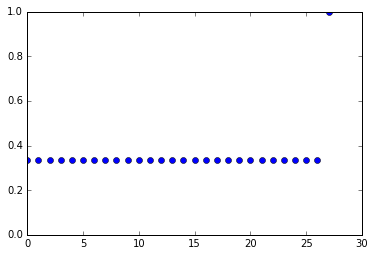

In [189]:
axes = plt.plot(x, y, 'o');
plt.axis((0,30,0,1))